In [1]:
from astropy.table import Table, join
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [2]:
data = join(Table.read('gracedb.txt', format='ascii'),
            Table.read('lvalert.txt', format='ascii'),
            keys='uuid')
lvalert_latency = data['time_2'] - data['time_1']

data = join(Table.read('gracedb-playground.txt', format='ascii'),
            Table.read('igwnalert-playground.txt', format='ascii'),
            keys='uuid')
igwn_alert_latency = data['time_2'] - data['time_1']

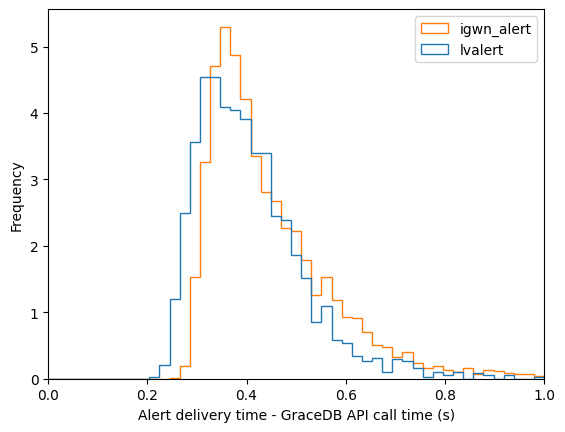

In [3]:
ax = plt.axes()
ax.hist(
    [lvalert_latency, igwn_alert_latency],
    histtype='step', density=True,
    label=['lvalert', 'igwn_alert'],
    bins=np.linspace(0, 1))
ax.legend()
ax.set_xlim(0, 1)
ax.set_xlabel('Alert delivery time - GraceDB API call time (s)')
ax.set_ylabel('Frequency')
plt.savefig('latency.png', dpi=300)


In [4]:
stats.describe(igwn_alert_latency)

DescribeResult(nobs=3091, minmax=(0.26430821418762207, 10.666062831878662), mean=0.46754979200249003, variance=0.12984777935738398, skewness=18.2245124404387, kurtosis=423.23745842952644)

In [5]:
stats.describe(lvalert_latency)

DescribeResult(nobs=1854, minmax=(0.2199254035949707, 2.6331770420074463), mean=0.411787502459595, variance=0.017736284824306347, skewness=4.438505897052771, kurtosis=50.143877583004326)

In [6]:
np.median(igwn_alert_latency) - np.median(lvalert_latency)

0.024177074432373047